# Machine Learning - Killing Infestations with KMeans
By **Daniel Palacio** (github.com/palaciodaniel) - January 2021

- - -

**IMPORTANT NOTE:** This whole Notebook is entirely fictional, and it was created just for demonstrative purposes. For that reason, it is an extremely simplified and unrealistic example. In real life, we would require domain knowledge from a pest control service for this situation, and that is assuming we would require to build a Machine Learning model in the first place.

- - -

## 1. Overview

Our client is actually the current administration of Buenos Aires (Argentina's capital city). They are planning to transform a trainyard into a park with a small shopping center. However, when assessing the state of the place, they discovered that it is completely infested, after decades of abandonment. 

Therefore, as a first step, and in order to protect all personnel from diseases, the vermin must be exterminated. However, the budget is considerably tight, which means they will need to be extremely careful with the amount of poison to be used, to avoid overspending.

In that sense, using Machine Learning -and specifically KMeans- might prove useful, as it can help us determine the most strategic spots to put the poison traps.

As a reference, the following is an aerial photograph of the trainyard. It was taken by Campbell, and it was [uploaded to Unsplash](https://unsplash.com/photos/rbBEs6Hljyg) as well.

![](trainyard.jpeg)

In [1]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

- - -

## 2. Plot creation

We are going to use that image as the plot background. This will allow us to easily visualize where the different instances of the plague were spotted. It must be noted that previous to this, we edited the image with [GNU Image Manipulation Program (GIMP)](https://www.gimp.org/) to reduce its contrast; otherwise it would become difficult to see the dots later.

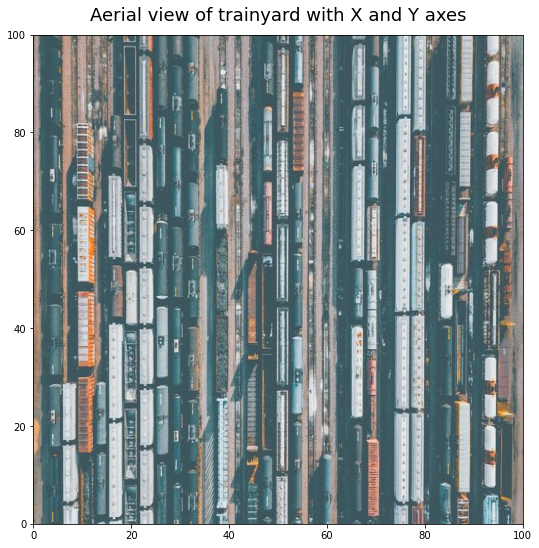

In [2]:
plt.rcParams["figure.figsize"] = (9, 9)

trainyard = plt.imread("trainyard_bright.jpeg")

fig, ax = plt.subplots()
ax.imshow(trainyard, extent=[0, 100, 0, 100])
plt.title("Aerial view of trainyard with X and Y axes", pad = 14, size = 18)
plt.show()

- - -

## 3. Plague coordinates

Now we need to add the -fictitious- coordinates where the plague instances were spotted. We can assume that motion sensors where used, and the data collected is from a certain moment during the early morning.

Using *numpy*, we will create an array with 2000 random values between 1 and 99 (so that they are between the axes limits from the previous plot). After that, we will reshape the array into two columns with 1000 observations, in a way that the first column represents the X axis, and the second one the Y axis.

In [3]:
coordinates = np.random.randint(1, 99, size = 2000).reshape(1000, 2)
print("New shape:", coordinates.shape, "\n")
print("First ten observations: \n\n", coordinates[:10])

New shape: (1000, 2) 

First ten observations: 

 [[15 98]
 [92 92]
 [18 67]
 [30 77]
 [30 22]
 [96 59]
 [30 82]
 [32 69]
 [68 69]
 [71 73]]


- - -

## 4. Plotting the coordinates

Now we only need to add the coordinates to the previous plot, to see for ourselves how serious the infestation is!

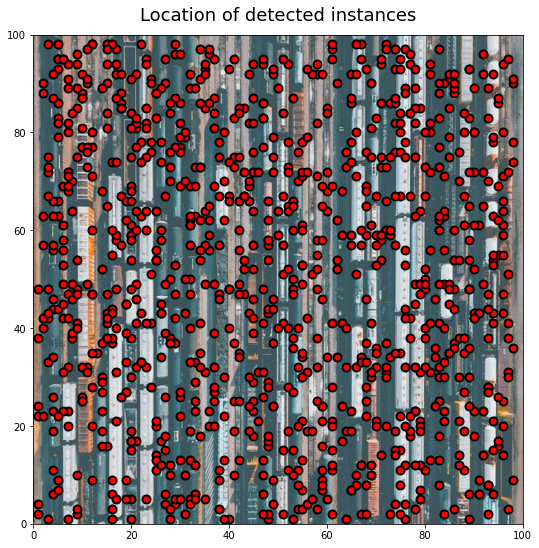

In [4]:
# Previous code
fig, ax = plt.subplots()
ax.imshow(trainyard, extent=[0, 100, 0, 100])

# New code
ax.scatter(x = coordinates[:, 0], 
           y = coordinates[:, 1], 
           s = 64,
           color='red', 
           linewidths = 2,
           edgecolors = "black")

plt.title("Location of detected instances", pad = 14, size = 18)

# Show results
plt.show()

- - -

## 5. Getting the optimal number of groups

After plotting the observations, sometimes is pretty obvious in how many groups the data should be divided. This is not the case though, so we will need to use the **Elbow Method** to determine the correct number.

Basically, what this method does is to iterate over several KMeans models, every one with a different number of clusters. Then we get the inertias, plot them and select for our definitive model the number of clusters for which the inertia curve becomes linear after it. This is the *elbow* referenced by the name of the method.

The scikit-learn's [documentation for KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) defines **inertia** as the *sum of squared distances of samples to their closest cluster center*.

In [5]:
# Getting the different inertias

num_kclusters = range(1, 10)
inertia_list = []

for num in num_kclusters:
    kmodel = KMeans(n_clusters = num).fit(coordinates)
    inertia_list.append(kmodel.inertia_)

print(inertia_list)

[1608626.110000003, 990558.0432430704, 613610.6143721713, 393866.71957157523, 331289.7603395367, 274421.76963522146, 230852.8325590118, 197767.83659185667, 173795.5149982537]


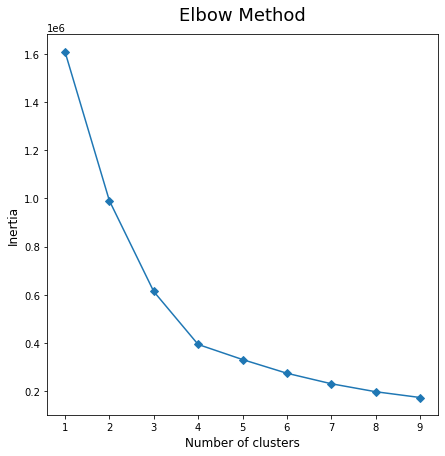

In [6]:
# Plotting the Elbow Method

plt.rcParams["figure.figsize"] = (7, 7)
fig, ax = plt.subplots()
ax.plot(num_kclusters, inertia_list, marker = "D")
plt.title("Elbow Method", pad = 14, size = 18)
plt.xlabel("Number of clusters", size = 12)
plt.ylabel("Inertia", size = 12)
plt.show()

We see the *elbow* is on X value 4, so that is the number of clusters we will use on our model. Once we visualize it we will see that it was clearly a very sensible choice.

- - -

## 6. Applying KMeans

Now we will instantiate our proper KMeans model, which will be used to fit the coordinates and predict which group every single one of them belong to.

In [7]:
kmeans = KMeans(n_clusters = 4)
labels = kmeans.fit_predict(coordinates)
print(labels)

[3 0 3 3 1 0 3 3 0 0 1 0 3 1 1 3 3 1 2 0 0 2 0 3 0 2 1 2 1 2 3 2 1 0 2 2 0
 0 2 3 1 3 2 3 2 0 0 0 1 0 2 2 1 1 1 0 1 1 1 0 2 1 1 3 1 2 3 0 3 2 0 1 3 1
 0 0 3 3 2 3 1 1 0 2 3 2 3 0 2 3 1 1 2 2 0 1 1 0 1 3 2 2 1 1 0 0 2 0 1 3 0
 1 0 2 0 0 3 1 0 3 1 2 1 1 0 1 3 1 3 2 1 2 0 3 2 0 1 3 1 3 2 0 1 1 2 3 1 2
 1 3 3 3 1 0 1 2 2 1 0 2 1 1 1 0 1 2 1 3 1 1 0 3 2 3 3 0 3 3 2 2 0 2 1 3 2
 3 0 3 0 1 3 0 0 3 1 1 2 2 2 1 3 3 3 1 1 0 3 2 3 3 3 3 0 1 1 1 1 3 0 0 1 0
 1 1 0 3 3 3 2 0 3 3 2 2 1 3 2 0 3 0 0 2 3 0 2 0 1 3 1 1 0 0 2 2 1 2 0 2 2
 1 0 2 2 3 0 0 0 3 2 1 2 2 2 0 2 2 1 1 0 0 0 3 2 2 0 3 2 2 0 1 0 3 1 2 0 3
 3 1 2 3 1 3 2 3 1 0 2 2 1 2 1 2 3 2 3 2 2 2 3 1 0 3 1 3 0 0 2 0 3 2 0 2 3
 0 0 2 0 3 3 0 2 1 3 0 0 2 1 3 0 3 0 3 3 2 3 0 2 0 1 2 1 0 0 2 3 1 2 2 2 0
 3 0 2 1 0 2 1 3 1 0 1 0 2 1 2 3 0 1 1 2 0 0 1 1 2 0 0 2 1 2 1 3 0 3 2 2 3
 2 2 0 3 2 2 0 3 1 0 2 2 2 0 3 3 0 1 1 0 3 2 0 2 2 1 2 1 0 2 1 2 3 1 3 0 3
 2 0 2 1 3 0 2 2 0 1 0 3 1 1 3 1 3 0 0 3 2 2 3 1 2 2 2 2 0 3 1 0 3 3 1 1 1
 3 3 0 0 3 1 0 1 0 3 1 2 

These labels inform us to which group the model assigned every observation. So, for instance, the first observation was included to the fourth group, the second observation to the second group, etc.

Do not get confused! Since the labeling starts from 0, then 0 is considered the first group, after which 1 is the second group, and so on.

- - -

## 7. Plotting the groups

Now we will use the model's labels as a filter on the trainyard plot, so that we can visualize the distribution of groups for all the observations.

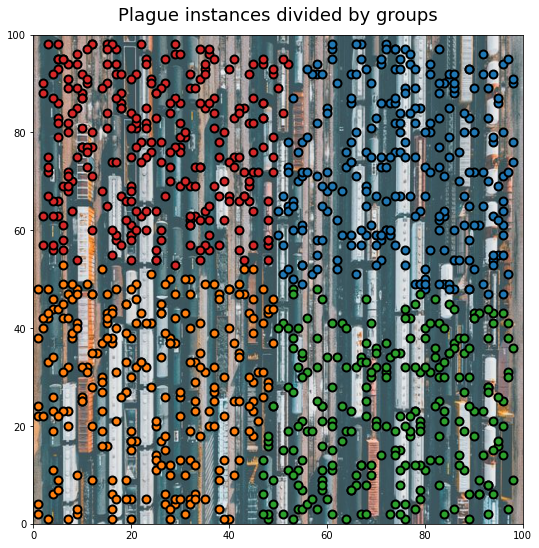

In [8]:
# New variables
unique_labels = np.unique(labels)
 
# Previous code
plt.rcParams["figure.figsize"] = (9, 9)
fig, ax = plt.subplots()
ax.imshow(trainyard, extent=[0, 100, 0, 100])

# New code
for label in unique_labels:
    ax.scatter(coordinates[labels == label, 0], 
               coordinates[labels == label, 1], 
               s = 64,
               linewidths = 2, 
               edgecolors = "black")

plt.title("Plague instances divided by groups", pad = 14, size = 18)

# Show results
plt.show()

- - -

## 8. Plotting the location of traps

The final step consists on determining the exact points where the poison traps must be placed. We can use for that the coordinates for the model's **cluster centers** -also called **centroids**-.

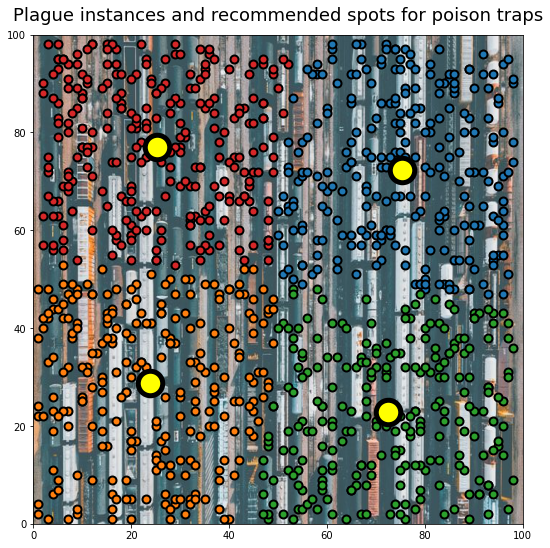

In [9]:
# New variables
centroids = kmeans.cluster_centers_

# Previous code
fig, ax = plt.subplots()
ax.imshow(trainyard, extent=[0, 100, 0, 100])
for label in unique_labels:
    ax.scatter(coordinates[labels == label, 0], 
               coordinates[labels == label, 1], 
               s = 64,
               linewidths = 2, 
               edgecolors = "black")

# New code
plt.scatter(centroids[:, 0] , centroids[:, 1] , s = 600, linewidths = 5, edgecolors = "black", color = "yellow")
plt.title("Plague instances and recommended spots for poison traps", pad = 14, size = 18)

# Show results
plt.show()